#### Importando Libs

In [57]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Classificador
from sklearn import tree #Tem uma estrutura de árvore que será usada
from sklearn.tree import DecisionTreeClassifier #Classificador que gera uma árvore de regras
from sklearn.ensemble import RandomForestClassifier

# Separação dos dados entre treino e teste.
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#### Coletando Dataset

In [58]:
dados = datasets.load_iris()
dados

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Exibindo os Dados

In [59]:
dados['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Exibindo a feature target

In [60]:
dados['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Nomes das features

In [61]:
dados['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Nome das classificações da features alvo.

In [62]:
dados['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Regrassão

#### LinearRegression

In [63]:
# Separando as colunas de interesse
X = dados['data']
y = dados['target']
features = dados['feature_names']
targets = dados['target_names']

# separando dados para trino e teste.
# test_size = 0.2 % 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Criar modelo
lr = LinearRegression()

# treinar modelo.
lr.fit(X_train, y_train)

#Predição dos dados de Teste
y_pred = lr.predict(X_test)

# Verifica os erros.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcular o R Squared
r2 = r2_score(y_test,y_pred)

#### Resultados.
- MSE
- RMSE
- R2
- Coefficients
- Intercept

In [64]:
# Print de valores.
print("MSE Value: ", round(mse, 2))
print("RMSE Value: ", round(rmse,2))
print("R2 Value: ", round(r2, 2))
print ('Coefficients: ', lr.coef_)
print ('Intercept: ', lr.intercept_)

MSE Value:  0.04
RMSE Value:  0.2
R2 Value:  0.94
Coefficients:  [-0.10753506 -0.05844926  0.2647557   0.52929416]
Intercept:  0.18080804062267852


#### LogisticRegression

In [65]:
# Separando os dados de entrada e saída
X = dados['data']
y = dados['target']

# Divisao dos dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Criacao do modelo
model = LogisticRegression(random_state = 42)

# Treinamento do modelo
model.fit(X_train, y_train)

# Predicao dos dados de teste
y_pred = model.predict(X_test)

# Verifica os erros.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcular o R Squared
r2 = r2_score(y_test,y_pred)

In [66]:
# Print de valores.
print("MSE Value: ", round(mse, 2))
print("RMSE Value: ", round(rmse,2))
print("R2 Value: ", round(r2, 2))
print ('Coefficients: ', lr.coef_)
print ('Intercept: ', lr.intercept_)

MSE Value:  0.0
RMSE Value:  0.0
R2 Value:  1.0
Coefficients:  [-0.10753506 -0.05844926  0.2647557   0.52929416]
Intercept:  0.18080804062267852


## Classificação

#### KNeighborsClassifier

In [67]:
# dados de entrada e saida.
X2 = dados['data']
y2 = dados['target']

# Divisao dos dados em treinamento e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

# Definicao do numero de vizinhos de forma arbitraria
# hyper parametros, impacta na performance do modelo. 2 pode ser alterado. numero de cluster.
k = 2

# Criacao do modelo
knn = KNeighborsClassifier(k)

# Treinamento
knn.fit(X_train2, y_train2)

# Teste
y_pred2 = knn.predict(X_test2)


# Metricas corretas para classificação
# Avaliando o desempenho
acc_knn = accuracy_score(y_test2, y_pred2)

#precision_knn = precision_score(y_test2, y_pred2)

#recall_knn = recall_score(y_test2, y_pred2)

#### Resultados.
- MSE
- RMSE
- R2
- Resultado da classificação

In [68]:
print("Acracia:", round(acc_knn,2)*100)
#print("Precisão:", round(precision_knn,2)*100)
#print("Precisão:", round(recall_knn,2)*100)

Acracia: 97.0


### DecisionTreeClassifier

In [69]:
# Divisao de dados em treinamento e teste
clf = DecisionTreeClassifier(criterion="entropy")
    
baseAtributos = X_train2
baseRotulos = y_train2

clf.fit(baseAtributos, baseRotulos)

DecisionTreeClassifier(criterion='entropy')

In [70]:
y_pred_tree = clf.predict(X_test2)

acc_rf_tree = accuracy_score(y_test2, y_pred_tree)

#precision_tree = precision_score(y_test2, y_pred_tree)

#recall_tree = recall_score(y_test2, y_pred_tree)

#### Resultado

In [71]:
print("Acracia:", round(acc_rf_tree,2)*100)
#print("Precisão:", round(precision_tree,2)*100)
#print("Precisão:", round(recall_tree,2)*100)

Acracia: 100.0


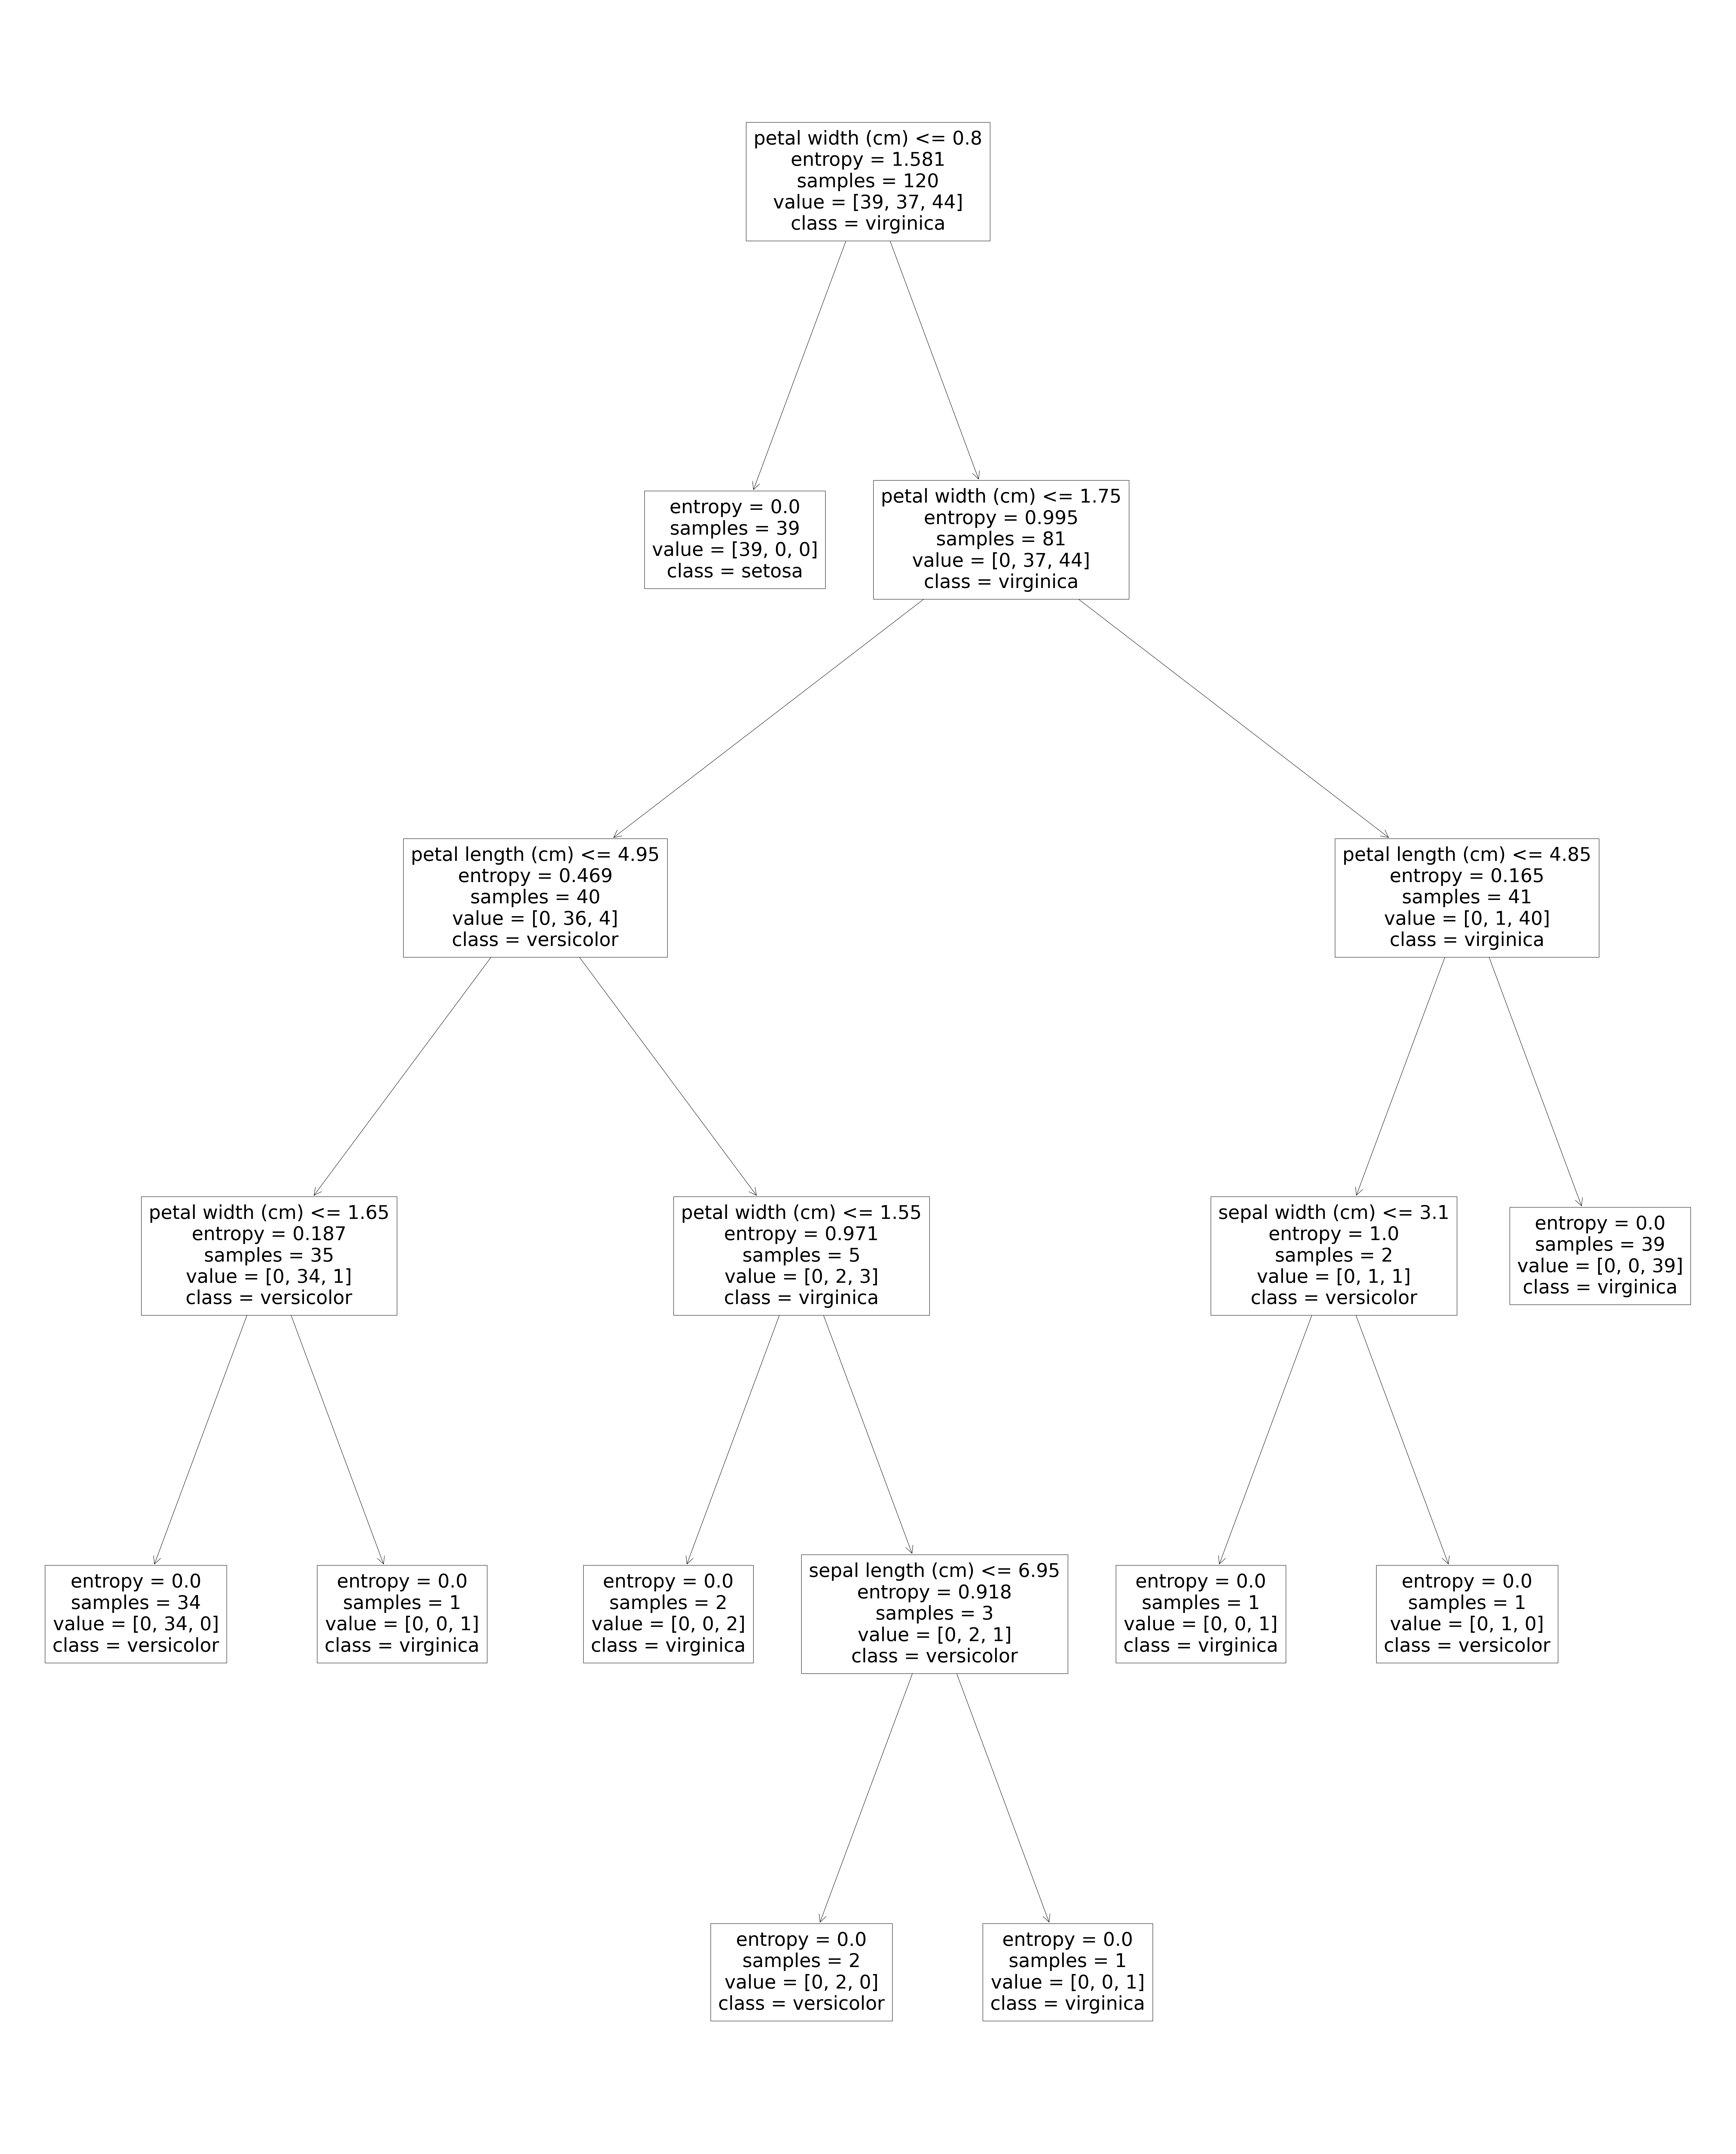

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80,100))
tree.plot_tree(clf, feature_names=features, class_names=targets,  ax=ax, filled=False)
plt.show()